# Stock Prices predictions

# DER_EU_ENXT_ALL_SUM_20190520.csv

## Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product
from sklearn.preprocessing import StandardScaler

In [2]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [3]:
import os
print(os.listdir("../input"))

['minidata', 'level2stockanalysis']


In [4]:
df = pd.read_csv("../input/level2stockanalysis/DER_EU_ENXT_ALL_SUM_20190520.csv")
df.head()

,H;DER_EU_ENXT_ALL_SUM.csv;2019-05-21 04:35:30
0,D;MarketPlace;AssetClass;AssetGroup;ExchangeCo...
1,E;AMS;DRV;EQU;A;F;AA6;AFAA6190600000F;20190621...
2,E;AMS;DRV;EQU;A;F;AA6;AFAA6190700000F;20190719...
3,E;AMS;DRV;EQU;A;F;AA6;AFAA6190800000F;20190816...
4,E;AMS;DRV;EQU;A;F;AA6;AFAA6190900000F;20190920...


In [5]:
df = df.iloc[:,0].str.split(';', expand=True)

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

df.head()

,D,MarketPlace,AssetClass,AssetGroup,ExchangeCode,InstrumentType,InstrumentTrading Symbol,InstrumentID,ExpiryDate,ExercisePrice,ActualExercisePrice,OptionCategory,Open,High,Low,TradeCount,Close,Settlement,COBVolume,OffCOBVolume,TotalVolume,OpenInterest,OpenInterestDate,EndofDayDelta,Volatility,VolatilityForValuation
1,E,AMS,DRV,EQU,A,F,AA6,AFAA6190600000F,20190621,0,0,F,0,0,0,0,0,30.7306,0,0,0,0,20190520,0,0,0.000000
2,E,AMS,DRV,EQU,A,F,AA6,AFAA6190700000F,20190719,0,0,F,0,0,0,0,0,30.7223,0,0,0,0,20190520,0,0,0.000000
3,E,AMS,DRV,EQU,A,F,AA6,AFAA6190800000F,20190816,0,0,F,0,0,0,0,0,30.7141,0,0,0,0,20190520,0,0,0.000000
4,E,AMS,DRV,EQU,A,F,AA6,AFAA6190900000F,20190920,0,0,F,0,0,0,0,0,30.7038,0,0,0,0,20190520,0,0,0.000000
5,E,AMS,DRV,EQU,A,F,AA6,AFAA6191200000F,20191220,0,0,F,0,0,0,0,0,30.677,0,0,0,0,20190520,0,0,0.000000


In [6]:
df.shape

(100894, 26)

In [7]:
print(df.columns)

Index(['D', 'MarketPlace', 'AssetClass', 'AssetGroup', 'ExchangeCode',
       'InstrumentType', 'InstrumentTrading Symbol', 'InstrumentID',
       'ExpiryDate', 'ExercisePrice', 'ActualExercisePrice', 'OptionCategory',
       'Open', 'High', 'Low', 'TradeCount', 'Close', 'Settlement', 'COBVolume',
       'OffCOBVolume', 'TotalVolume', 'OpenInterest', 'OpenInterestDate',
       'EndofDayDelta', 'Volatility', 'VolatilityForValuation'],
      dtype='object', name=0)


In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values

,percent_missing
0,
D,0.000000
MarketPlace,0.000000
AssetClass,0.000000
AssetGroup,0.000991
ExchangeCode,0.000991
InstrumentType,0.000991
InstrumentTrading Symbol,0.000991
InstrumentID,0.000991
ExpiryDate,0.000991


## Data Visualization

In [9]:
df['Settlement'] = pd.to_numeric(df['Settlement'], errors='coerce')

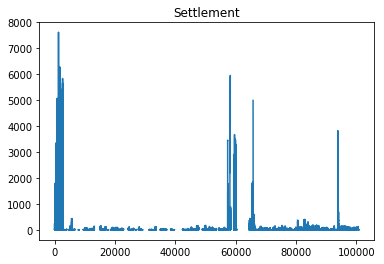

In [10]:
df['Settlement'].plot()
plt.title("Settlement")
plt.show()

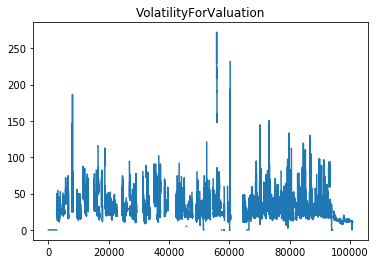

In [11]:
df['VolatilityForValuation'] = pd.to_numeric(df['VolatilityForValuation'], errors='coerce')
df['VolatilityForValuation'].plot()
plt.title("VolatilityForValuation")
plt.show()

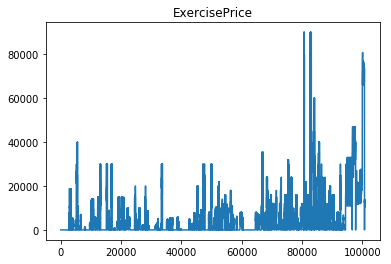

In [12]:
df['ExercisePrice'] = pd.to_numeric(df['ExercisePrice'], errors='coerce')
#df['ExercisePrice'].value_counts()
df['ExercisePrice'].plot()
plt.title("ExercisePrice")
plt.show()

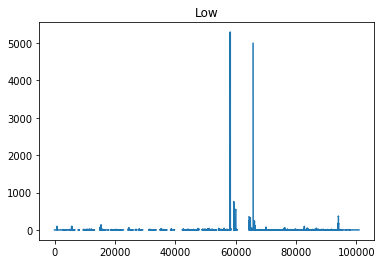

In [13]:
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
#df['ExercisePrice'].value_counts()
df['Low'].plot()
plt.title("Low")
plt.show()

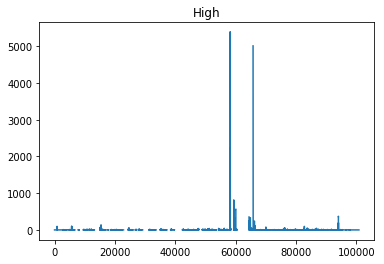

In [14]:
df['High'] = pd.to_numeric(df['High'], errors='coerce')
#df['ExercisePrice'].value_counts()
df['High'].plot()
plt.title("High")
plt.show()

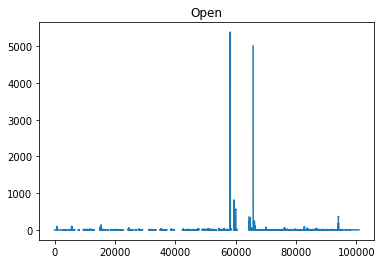

In [15]:
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
#df['ExercisePrice'].value_counts()
df['Open'].plot()
plt.title("Open")
plt.show()

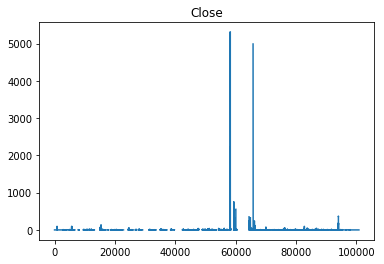

In [16]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
#df['ExercisePrice'].value_counts()
df['Close'].plot()
plt.title("Close")
plt.show()

## Machine Learning

In [17]:
X = df[['ExercisePrice', 'ActualExercisePrice',
       'Open', 'High', 'Low', 'TradeCount', 'Close', 'Settlement', 'COBVolume',
       'OffCOBVolume', 'TotalVolume',
       'EndofDayDelta', 'Volatility']]
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

Y = df['VolatilityForValuation'].fillna(0)

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.05, random_state = 101)

In [18]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1000)

model.fit(X_Train,Y_Train)

y_pred = model.predict(X_Test)

print(smape_kun(Y_Test,y_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0322448329100822


In [20]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

clf.fit(X_Train,Y_Train)

y_pred = clf.predict(X_Test)

print(smape_kun(Y_Test,y_pred))

79.94974981120832


In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_Train,Y_Train)

y_pred = reg.predict(X_Test)

print(smape_kun(Y_Test,y_pred))
print(y_pred)

80.02601229757758
[27.45681216 11.44692291 24.43405989 ... 25.46844104  0.41435491
  8.62502859]


In [22]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X_Train,Y_Train)

y_pred = tree_regressor.predict(X_Test)

print(smape_kun(Y_Test,y_pred))

1.1429487504424054


In [23]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
Y_Train = lab_enc.fit_transform(Y_Train)
print(utils.multiclass.type_of_target(Y_Train))

multiclass


In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(smape_kun(Y_Test,predictionlda))

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


197.44040632212443


### https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20LSTM%20VIX.ipynb

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

def convertSeriesToMatrix(vectorSeries, sequence_length):
    matrix=[]
    for i in range(len(vectorSeries)-sequence_length+1):
        matrix.append(vectorSeries[i:i+sequence_length])
    return matrix

np.random.seed(2019)
path_to_dataset = "../input/minidata/mycsvfile.csv"
sequence_length = 20


# vector to store the time series
vector_vix = []
with open(path_to_dataset) as f:
    next(f) # skip the header row
    next(f)
    for line in f:
        fields = line.split(',')
        vector_vix.append(float(fields[6]))
        

# convert the vector to a 2D matrix
matrix_vix = convertSeriesToMatrix(vector_vix, sequence_length)

# shift all data by mean
matrix_vix = np.array(matrix_vix)
shifted_value = matrix_vix.mean()
matrix_vix -= shifted_value
print("Data shape: ", matrix_vix.shape)

# split dataset: 80% for training and 10% for testing
train_row = int(round(0.8 * matrix_vix.shape[0]))
train_set = matrix_vix[:train_row, :]

# shuffle the training set (but do not shuffle the test set)
np.random.shuffle(train_set)

# the training set
X_train = train_set[:, :-1]
# the last column is the true value to compute the mean-squared-error loss
y_train = train_set[:, -1] 
# the test set
X_test = matrix_vix[train_row:, :-1]
y_test = matrix_vix[train_row:, -1]

# the input to LSTM layer needs to have the shape of (number of samples, the dimension of each element)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
model = Sequential()
# layer 1: LSTM
model.add(LSTM( input_dim=1, output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
# layer 2: LSTM
model.add(LSTM(output_dim=100, return_sequences=False))
model.add(Dropout(0.2))
# layer 3: dense
# linear activation: a(x) = x
model.add(Dense(output_dim=1, activation='linear'))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")
model.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.05, verbose=1)

# evaluate the result
test_mse = model.evaluate(X_test, y_test, verbose=1)
print('The mean squared error (MSE) on the test data set is %.3f over %d test samples.' % (test_mse, len(y_test)))
# get the predicted values
predicted_values = model.predict(X_test)
num_test_samples = len(predicted_values)
predicted_values = np.reshape(predicted_values, (num_test_samples,1))

Using TensorFlow backend.


Data shape:  (100874, 20)
Instructions for updating:
Colocations handled automatically by placer.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, units=100)`


Instructions for updating:
Use tf.cast instead.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`


Train on 76664 samples, validate on 4035 samples
Epoch 1/100
76664/76664 [==============================] - 23s 303us/step - loss: 1107.0870 - val_loss: 8286.3328
Epoch 2/100
76664/76664 [==============================] - 21s 277us/step - loss: 1105.9221 - val_loss: 8285.5120
Epoch 3/100
76664/76664 [==============================] - 21s 277us/step - loss: 1105.0541 - val_loss: 8283.3020
Epoch 4/100
76664/76664 [==============================] - 21s 277us/step - loss: 1104.4473 - val_loss: 8282.9193
Epoch 5/100
76664/76664 [==============================] - 21s 279us/step - loss: 1104.3094 - val_loss: 8281.6626
Epoch 6/100
76664/76664 [==============================] - 21s 278us/step - loss: 1104.1902 - val_loss: 8279.5012
Epoch 7/100
76664/76664 [==============================] - 21s 278us/step - loss: 1103.7844 - val_loss: 8280.2761
Epoch 8/100
76664/76664 [==============================] - 21s 280us/step - loss: 1103.2841 - val_loss: 8280.0987
Epoch 9/100
76664/76664 [==============

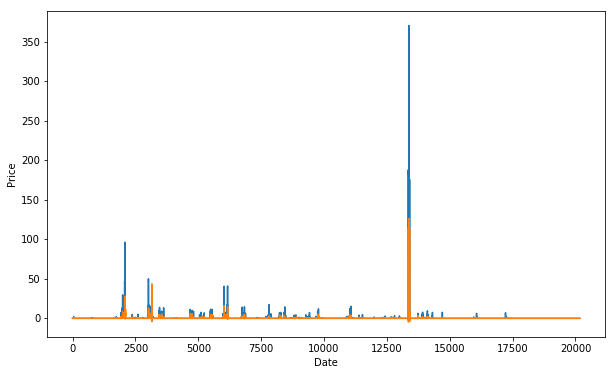

In [26]:
# plot the results
fig = plt.figure(figsize=(10,6))
plt.plot(y_test + shifted_value)
plt.plot(predicted_values + shifted_value)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

# LSTM

> ### Model Artchitecture taken from Ralph Schlosser: https://www.kaggle.com/ternaryrealm/lstm-time-series-explorations-with-keras

In [27]:
# Let's load the required libs.
# We'll be using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [28]:
# Get the raw data values from the pandas data frame.
data_raw = df['VolatilityForValuation'].fillna(0).values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw.reshape(-1, 1))

# Print a few values.
dataset[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [29]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.60

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (60536, 40358)


In [30]:
# FIXME: This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [31]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)


In [32]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(4, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 3, 
              batch_size = 1, 
              verbose = 2)
    
    return(model)

In [33]:
# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/3
 - 121s - loss: 4.6586e-04
Epoch 2/3
 - 122s - loss: 2.9475e-04
Epoch 3/3
 - 121s - loss: 2.9369e-04


In [34]:
import math

def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

In [35]:
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 4.52 RMSE
Test data score: 5.65 RMSE


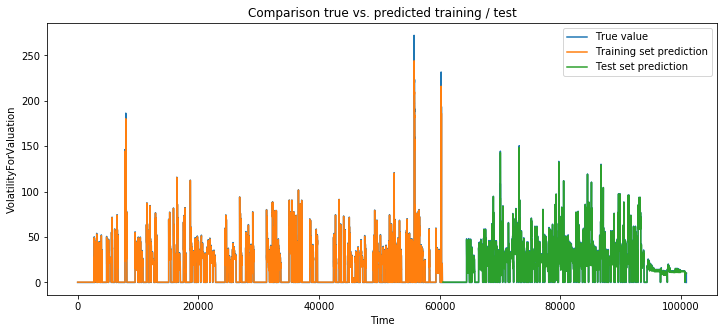

In [36]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
fig, ax = plt.subplots(figsize=(12,5))
#ax.plot(x, y)
#plt.figure(figsize = (15, 5))
ax.plot(scaler.inverse_transform(dataset), label = "True value")
ax.plot(train_predict_plot, label = "Training set prediction")
ax.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Time")
plt.ylabel("VolatilityForValuation")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()

In [37]:
# Get the raw data values from the pandas data frame.
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
data_raw = df['Open'].fillna(0).values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw.reshape(-1, 1))

# Print a few values.
dataset[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [38]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.60

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (60536, 40358)


In [39]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)


In [40]:
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/3
 - 124s - loss: 5.6262e-05
Epoch 2/3
 - 124s - loss: 5.4933e-05
Epoch 3/3
 - 122s - loss: 5.5274e-05


In [41]:
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 39.47 RMSE
Test data score: 26.14 RMSE


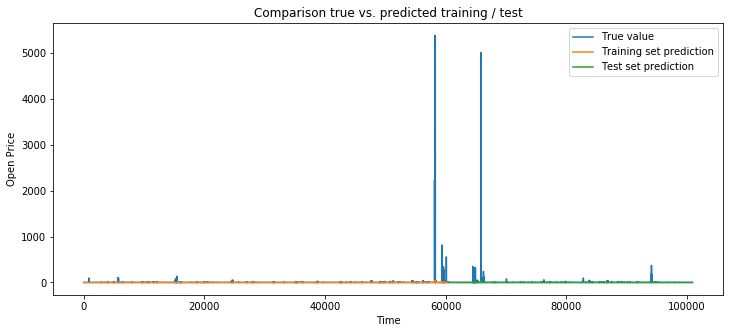

In [42]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
fig, ax = plt.subplots(figsize=(12,5))
#ax.plot(x, y)
#plt.figure(figsize = (15, 5))
ax.plot(scaler.inverse_transform(dataset), label = "True value")
ax.plot(train_predict_plot, label = "Training set prediction")
ax.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Time")
plt.ylabel("Open Price")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()

Number of entries (training set, test set): (60536, 40358)
Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)
Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)
Epoch 1/3
 - 126s - loss: 5.4433e-05
Epoch 2/3
 - 123s - loss: 5.5245e-05
Epoch 3/3
 - 125s - loss: 5.4864e-05
Training data score: 38.80 RMSE
Test data score: 26.04 RMSE


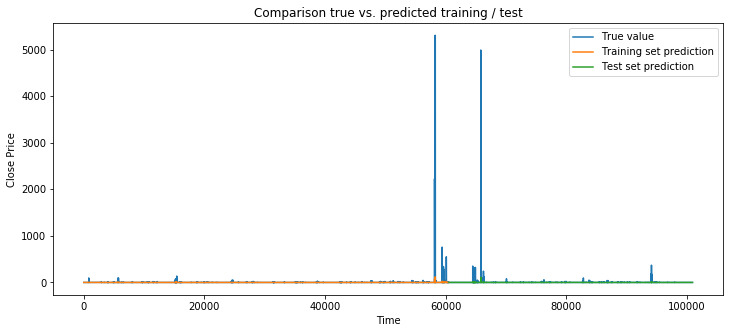

In [43]:
# Get the raw data values from the pandas data frame.
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
data_raw = df['Close'].fillna(0).values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw.reshape(-1, 1))

# Print a few values.
dataset[0:5]

# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.60

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

model1 = fit_model(train_X, train_Y, window_size)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
fig, ax = plt.subplots(figsize=(12,5))
#ax.plot(x, y)
#plt.figure(figsize = (15, 5))
ax.plot(scaler.inverse_transform(dataset), label = "True value")
ax.plot(train_predict_plot, label = "Training set prediction")
ax.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()

Number of entries (training set, test set): (60536, 40358)
Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)
Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)
Epoch 1/3
 - 127s - loss: 5.5524e-05
Epoch 2/3
 - 124s - loss: 5.5179e-05
Epoch 3/3
 - 125s - loss: 5.4904e-05
Training data score: 39.50 RMSE
Test data score: 26.31 RMSE


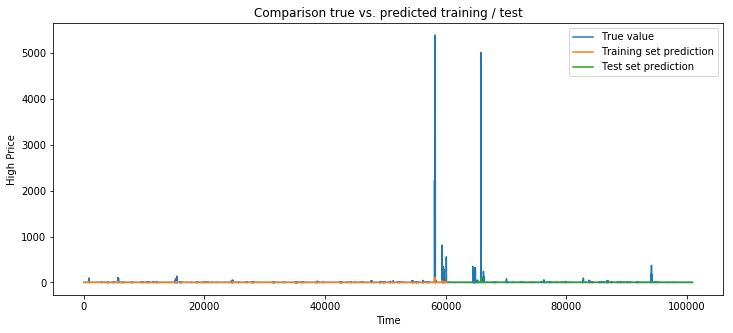

In [44]:
# Get the raw data values from the pandas data frame.
df['High'] = pd.to_numeric(df['High'], errors='coerce')
data_raw = df['High'].fillna(0).values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw.reshape(-1, 1))

# Print a few values.
dataset[0:5]

# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.60

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

model1 = fit_model(train_X, train_Y, window_size)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
fig, ax = plt.subplots(figsize=(12,5))
#ax.plot(x, y)
#plt.figure(figsize = (15, 5))
ax.plot(scaler.inverse_transform(dataset), label = "True value")
ax.plot(train_predict_plot, label = "Training set prediction")
ax.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Time")
plt.ylabel("High Price")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()

Number of entries (training set, test set): (60536, 40358)
Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)
Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)
Epoch 1/3
 - 126s - loss: 5.5179e-05
Epoch 2/3
 - 126s - loss: 5.6223e-05
Epoch 3/3
 - 127s - loss: 5.5461e-05
Training data score: 38.79 RMSE
Test data score: 26.03 RMSE


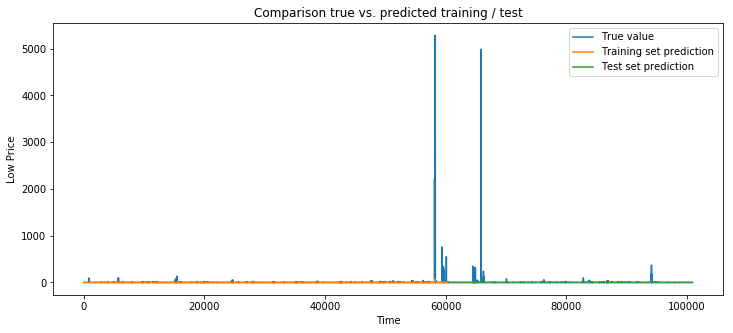

In [45]:
# Get the raw data values from the pandas data frame.
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
data_raw = df['Low'].fillna(0).values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw.reshape(-1, 1))

# Print a few values.
dataset[0:5]

# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.60

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

model1 = fit_model(train_X, train_Y, window_size)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
fig, ax = plt.subplots(figsize=(12,5))
#ax.plot(x, y)
#plt.figure(figsize = (15, 5))
ax.plot(scaler.inverse_transform(dataset), label = "True value")
ax.plot(train_predict_plot, label = "Training set prediction")
ax.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Time")
plt.ylabel("Low Price")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()

Number of entries (training set, test set): (60536, 40358)
Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)
Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)
Epoch 1/3
 - 129s - loss: 1.4095e-04
Epoch 2/3
 - 129s - loss: 1.1408e-04
Epoch 3/3
 - 128s - loss: 1.1305e-04
Training data score: 1088.28 RMSE
Test data score: 3650.44 RMSE


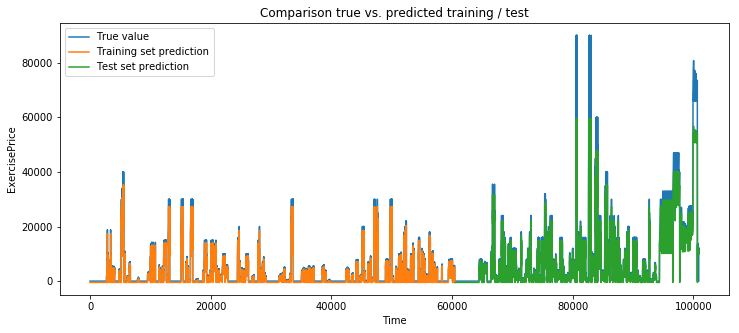

In [46]:
# Get the raw data values from the pandas data frame.
df['ExercisePrice'] = pd.to_numeric(df['ExercisePrice'], errors='coerce')
data_raw = df['ExercisePrice'].fillna(0).values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw.reshape(-1, 1))

# Print a few values.
dataset[0:5]

# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.60

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

model1 = fit_model(train_X, train_Y, window_size)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
fig, ax = plt.subplots(figsize=(12,5))
#ax.plot(x, y)
#plt.figure(figsize = (15, 5))
ax.plot(scaler.inverse_transform(dataset), label = "True value")
ax.plot(train_predict_plot, label = "Training set prediction")
ax.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Time")
plt.ylabel("ExercisePrice")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()

In [47]:
# Get the raw data values from the pandas data frame.
df['Settlement'] = pd.to_numeric(df['Settlement'], errors='coerce')
data_raw = df['Settlement'].fillna(0).values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw.reshape(-1, 1))

# Print a few values.
dataset[0:5]

# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.60

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

model1 = fit_model(train_X, train_Y, window_size)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

Number of entries (training set, test set): (60536, 40358)
Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)
Original training data shape:
(60534, 1)
New training data shape:
(60534, 1, 1)
Epoch 1/3
 - 131s - loss: 4.8680e-04
Epoch 2/3
 - 130s - loss: 4.2321e-04
Epoch 3/3
 - 129s - loss: 4.1138e-04
Training data score: 150.90 RMSE
Test data score: 71.92 RMSE


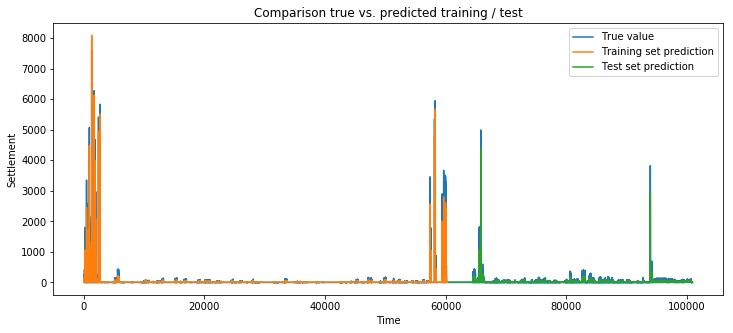

In [48]:
# Create the plot.
fig, ax = plt.subplots(figsize=(12,5))
#ax.plot(x, y)
#plt.figure(figsize = (15, 5))
ax.plot(scaler.inverse_transform(dataset), label = "True value")
ax.plot(train_predict_plot, label = "Training set prediction")
ax.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Time")
plt.ylabel("Settlement")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()

# EuronextLisbon-IntradayTrades-20190520.csv

## Preprocessing

In [49]:
df2 = pd.read_csv("../input/level2stockanalysis/EuronextLisbon-IntradayTrades-20190520.csv")
df2.head()

,Internal code;ISIN code;Instrument name;Trading Place;Category;Issuing country code;Segment;Trading currency code;Trading unit (currency or %);Registred date;Trade number;Trade indicator;Trade date;Trade time;Cross-trade indicator;Price (in trading currency);Volume;Turnover in euro
0,283259;PTBIXRYE0025;BCP IBEX 35 ;Lisbon;...
1,1364220;PTMENWOM0007;MOTA 4.5% 28NOV22 ;Lisbon...
2,377693;PTBIWWYE0052;BCP OURO ;Lisbon;...
3,1456889;DE000CJ36V67;DAX 11700TL 0619Z;Lisbon...
4,1281017;PTOTVMOE0000;OTRV FRN 23JUL25 ;Lisbon...


In [50]:
new_header = "Internal code;ISIN code;Instrument name;Trading Place;Category;Issuing country code;Segment;Trading currency code;Trading unit (currency or %);Registred date;Trade number;Trade indicator;Trade date;Trade time;Cross-trade indicator;Price (in trading currency);Volume;Turnover in euro"
new_header = new_header.split(';')
print(new_header)

['Internal code', 'ISIN code', 'Instrument name', 'Trading Place', 'Category', 'Issuing country code', 'Segment', 'Trading currency code', 'Trading unit (currency or %)', 'Registred date', 'Trade number', 'Trade indicator', 'Trade date', 'Trade time', 'Cross-trade indicator', 'Price (in trading currency)', 'Volume', 'Turnover in euro']


In [51]:
df2 = df2.iloc[:,0].str.split(';', expand=True)

df2.columns = new_header #set the header row as the df header

df2.head()

,Internal code,ISIN code,Instrument name,Trading Place,Category,Issuing country code,Segment,Trading currency code,Trading unit (currency or %),Registred date,Trade number,Trade indicator,Trade date,Trade time,Cross-trade indicator,Price (in trading currency),Volume,Turnover in euro
0,283259,PTBIXRYE0025,BCP IBEX 35,Lisbon,Certificate,PRT,,EUR,1,2019-05-20,272969,1,2019-05-20,13:47:18:871798,0,92.05,30,2761.5
1,1364220,PTMENWOM0007,MOTA 4.5% 28NOV22,Lisbon,Other bond,PRT,,EUR,2,2019-05-20,857852,1,2019-05-20,14:30:00:004348,0,101.76,12500,12720
2,377693,PTBIWWYE0052,BCP OURO,Lisbon,Certificate,PRT,,EUR,1,2019-05-20,14697,1,2019-05-20,15:21:58:804471,0,106.1,10,1061
3,1456889,DE000CJ36V67,DAX 11700TL 0619Z,Lisbon,Warrant,DEU,,EUR,1,2019-05-20,223044,1,2019-05-20,10:31:53:064227,0,2.08,1250,2600
4,1281017,PTOTVMOE0000,OTRV FRN 23JUL25,Lisbon,Government bond,PRT,,EUR,2,2019-05-20,858309,1,2019-05-20,12:25:16:744907,0,103.79,3000,3113.7


In [52]:
df2.shape

(16075, 18)

In [53]:
print(df2.columns)

Index(['Internal code', 'ISIN code', 'Instrument name', 'Trading Place',
       'Category', 'Issuing country code', 'Segment', 'Trading currency code',
       'Trading unit (currency or %)', 'Registred date', 'Trade number',
       'Trade indicator', 'Trade date', 'Trade time', 'Cross-trade indicator',
       'Price (in trading currency)', 'Volume', 'Turnover in euro'],
      dtype='object')


In [54]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values

,percent_missing
0,
D,0.000000
MarketPlace,0.000000
AssetClass,0.000000
AssetGroup,0.000991
ExchangeCode,0.000991
InstrumentType,0.000991
InstrumentTrading Symbol,0.000991
InstrumentID,0.000991
ExpiryDate,0.000991


## Data Visualisation

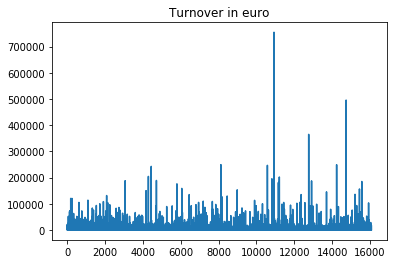

In [55]:
df2['Turnover in euro'] = pd.to_numeric(df2['Turnover in euro'], errors='coerce')
#df['ExercisePrice'].value_counts()
df2['Turnover in euro'].plot()
plt.title("Turnover in euro")
plt.show()